In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt


In [15]:
dataset = datasets.MNIST('/data', train=True, transform=transforms.ToTensor(), download=True)
dl = torch.utils.data.DataLoader(dataset, batch_size=64)

In [3]:
class MNISTConvModel(torch.nn.Module):
  def __init__(self):
    super(MNISTConvModel, self).__init__()
    self.layer1 = torch.nn.Conv2d(1,10,3, stride=1) # Output => [64, 10, 26,26]
    self.layer2 = torch.nn.MaxPool2d(2,2)
    self.layer3 = torch.nn.Linear(10*13*13, 10)
    self.layer4 = torch.nn.Softmax(1)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)

    #Flatten
    x = x.view(-1, 10*13*13)
    x = self.layer3(x)
    
    x = self.layer4(x)
    return x

model = MNISTConvModel()

opt = torch.optim.SGD(model.parameters(), 0.005)
loss_fn = torch.nn.CrossEntropyLoss()

In [8]:
loss = 0
for epoch in range(10):
  for x,y in dl:
    pred = model(x)
    loss = loss_fn(pred, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
  print("Done with epoch", epoch)
  print(loss)
  
print("FINAL LOSS IS: ", loss)

Done with epoch 0
tensor(1.6194, grad_fn=<NllLossBackward>)
Done with epoch 1
tensor(1.5596, grad_fn=<NllLossBackward>)
Done with epoch 2
tensor(1.5297, grad_fn=<NllLossBackward>)
Done with epoch 3
tensor(1.5221, grad_fn=<NllLossBackward>)
Done with epoch 4
tensor(1.5173, grad_fn=<NllLossBackward>)
Done with epoch 5
tensor(1.5138, grad_fn=<NllLossBackward>)
Done with epoch 6
tensor(1.5110, grad_fn=<NllLossBackward>)
Done with epoch 7
tensor(1.5088, grad_fn=<NllLossBackward>)
Done with epoch 8
tensor(1.5069, grad_fn=<NllLossBackward>)
Done with epoch 9
tensor(1.5054, grad_fn=<NllLossBackward>)
FINAL LOSS IS:  tensor(1.5054, grad_fn=<NllLossBackward>)


In [10]:
def accuracy():
  matches = 0
  with torch.no_grad():
    for x,y in dl:
      pred = model(x)
      _, predictions = torch.max(pred, 1)
      matches += ( predictions == y).sum().item()
  acc = matches/len(dataset)
  print("Accuracy is", acc)
  return acc
  
accuracy()

Accuracy is 0.9087333333333333


0.9087333333333333

torch.Size([64, 10, 26, 26])
torch.Size([64, 10, 13, 13])


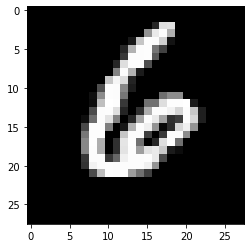

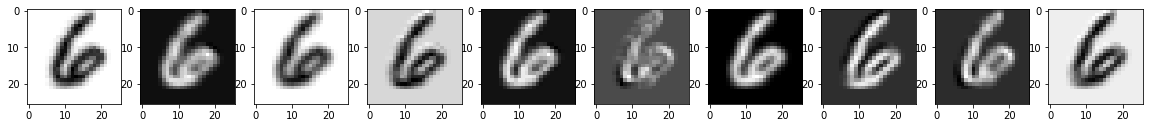

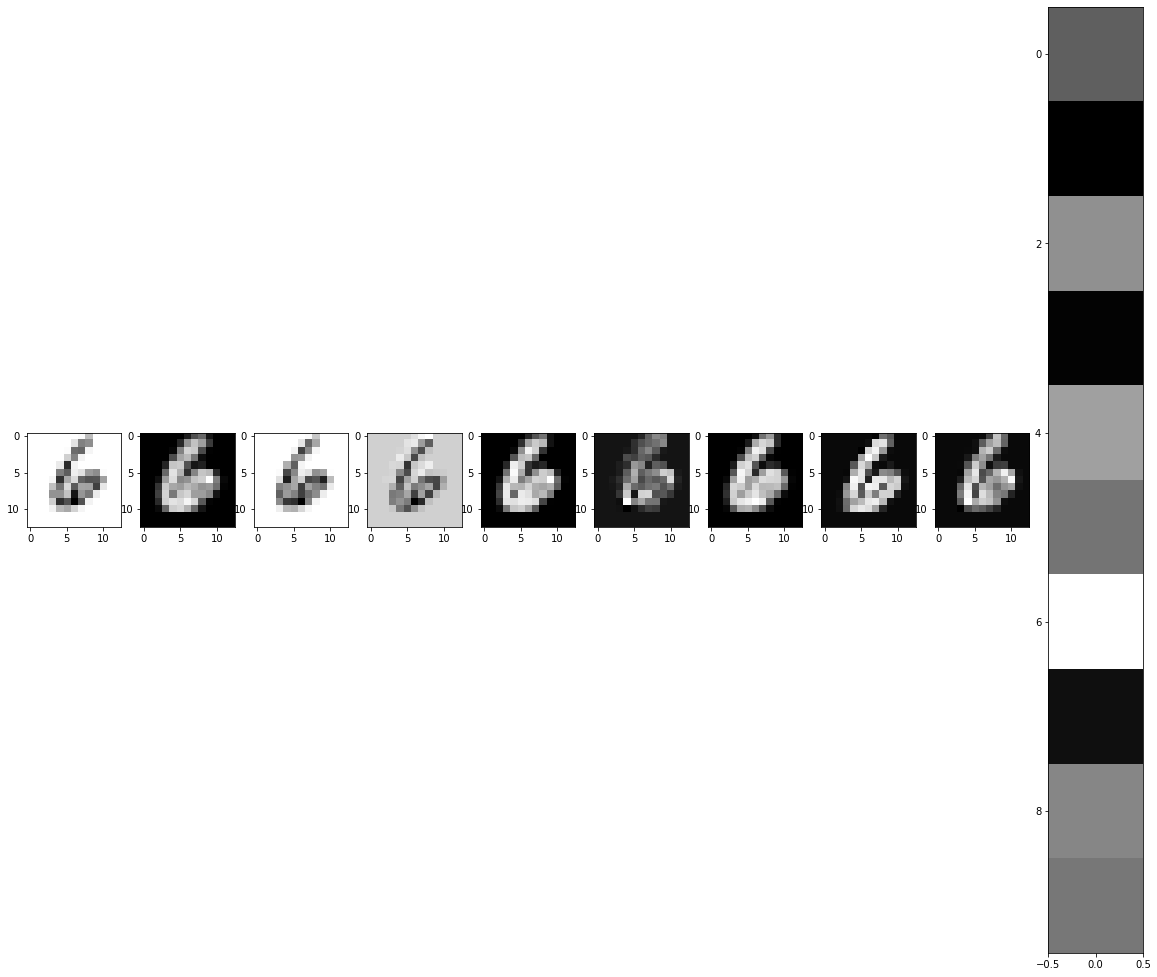

In [31]:
# Trying to understand what the conv layers are doing
IMG = 13
img = dataset[IMG][0]
plt.imshow(img[0], cmap='gray')

x1 = next(iter(dl))[0]

def plot_grid(out):
  print(out.shape)
  out = out.cpu().detach().numpy()
  n = out.shape[1]
  f, axarr = plt.subplots(1, n, figsize=(20, 20))
  for i in range(n):
    axarr[i].imshow(out[IMG][i], cmap='gray')


# Print activations from layer 1 (conv) for one sample input image
x1 = model.layer1(x1)
plot_grid(x1)

# Print activations from layer 2 (maxpool) for one sample input image
x1 = model.layer2(x1)
plot_grid(x1)

# Print activations from layer 3 (linear) for one sample input image
x1 = x1.view(-1, 10*13*13)
x1 = model.layer3(x1)
x1 = x1.detach().numpy().reshape(64,10,1)
plt.imshow(x1[IMG],  cmap='gray')
# plt.imshow()
# x1[IMG]
# torch.reshape(x1[IMG], (1,10))